<a href="https://colab.research.google.com/github/VitorDaSilvaOliveira/Documentacao-Projeto/blob/main/TrabalhoESPA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from google.colab import files

# Carregar a base de testagem
df_testes = pd.read_csv('drive/MyDrive/testagem.csv')

# Filtrar apenas os EUA
df_testes = df_testes[df_testes['Entity'] == 'United States - tests performed'].copy()

# Converter data
df_testes['Date'] = pd.to_datetime(df_testes['Date'], errors='coerce')
df_testes = df_testes.dropna(subset=['Date'])

# Selecionar e renomear colunas
df_testes = df_testes[[
    'Date',
    'Cumulative total',
    'Daily change in cumulative total',
    '7-day smoothed daily change',
    'Short-term positive rate',
    'Short-term tests per case'
]]

# Traduzir os nomes das colunas
df_testes.columns = [
    'Data',
    'Total acumulado de testes',
    'Variação diária de testes',
    'Média móvel de 7 dias (testes/dia)',
    'Taxa de positividade (curto prazo)',
    'Testes por caso (curto prazo)'
]

# Salvar e baixar
df_testes.to_csv('testagem_limpa_traduzida.csv', index=False)
files.download('testagem_limpa_traduzida.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
# Carregar a base de hospitalizações
df_hosp = pd.read_csv('drive/MyDrive/hospitalizacoes.csv')

# Converter data
df_hosp['date'] = pd.to_datetime(df_hosp['date'], errors='coerce')
df_hosp = df_hosp.dropna(subset=['date'])

# Agregar nacionalmente por data
df_hosp_nacional = df_hosp.groupby('date').agg({
    'previous_day_admission_adult_covid_confirmed': 'sum',
    'previous_day_admission_pediatric_covid_confirmed': 'sum',
    'total_adult_patients_hospitalized_confirmed_covid': 'sum',
    'total_pediatric_patients_hospitalized_confirmed_covid': 'sum',
    'percent_of_inpatients_with_covid': 'mean',
    'inpatient_beds_utilization': 'mean',
    'adult_icu_bed_utilization': 'mean',
    'deaths_covid': 'sum'
}).reset_index()

# Renomear colunas
df_hosp_nacional.columns = [
    'Data',
    'Internações adultas no dia (COVID confirmado)',
    'Internações pediátricas no dia (COVID confirmado)',
    'Total de adultos hospitalizados (COVID confirmado)',
    'Total de pediátricos hospitalizados (COVID confirmado)',
    'Percentual de internados com COVID',
    'Taxa de ocupação de leitos',
    'Taxa de ocupação de UTI adulta',
    'Óbitos por COVID no dia'
]

# Salvar e baixar
df_hosp_nacional.to_csv('hospitalizacoes_limpa_traduzida.csv', index=False)
files.download('hospitalizacoes_limpa_traduzida.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
df_analise = pd.merge(df_testes, df_hosp_nacional, on='Data')

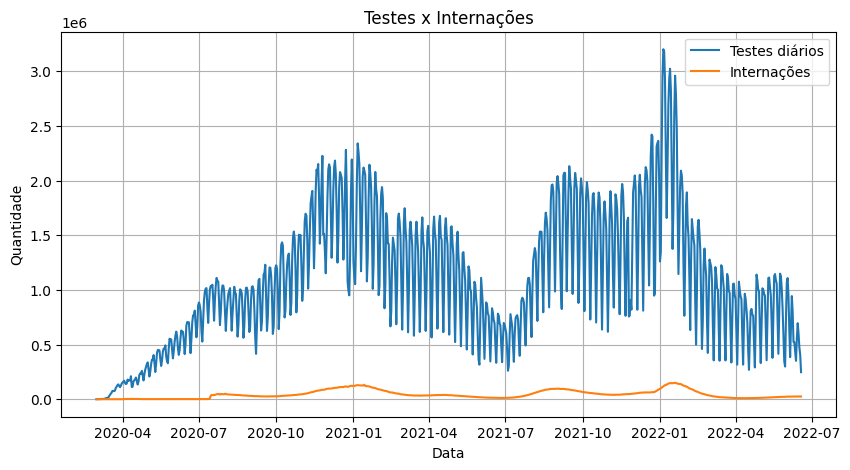

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_analise['Data'], df_analise['Variação diária de testes'], label='Testes diários')
plt.plot(df_analise['Data'], df_analise['Total de adultos hospitalizados (COVID confirmado)'], label='Internações')
plt.legend()
plt.title("Testes x Internações")
plt.xlabel("Data")
plt.ylabel("Quantidade")
plt.grid(True)
plt.show()


In [27]:
correlacoes = df_analise.corr(numeric_only=True)
print(correlacoes[['Variação diária de testes']])


                                                    Variação diária de testes
Total acumulado de testes                                            0.286287
Variação diária de testes                                            1.000000
Média móvel de 7 dias (testes/dia)                                   0.850601
Taxa de positividade (curto prazo)                                   0.232941
Testes por caso (curto prazo)                                       -0.214654
Internações adultas no dia (COVID confirmado)                        0.802448
Internações pediátricas no dia (COVID confirmado)                    0.630574
Total de adultos hospitalizados (COVID confirmado)                   0.763098
Total de pediátricos hospitalizados (COVID conf...                   0.612862
Percentual de internados com COVID                                   0.524188
Taxa de ocupação de leitos                                           0.681870
Taxa de ocupação de UTI adulta                                  